# Assignment 1

<img src="figures/buffon.png" alt="Tossing Needles" width="600" align="middle">

Buffon's Needle Problem was first proposed by Georges Buffon in 1737. By randomly throwing needles onto a hard floor marked with equally spaced lines, Buffon was able to derive a mathematial expression which could be used to calculate the value of pi. Specifically, the probability that a needle of length equal to the width of parallel boards overlaps with a board edge is $\frac{2}{\pi}$. 

One can estimate pi by dropping a large number of pins and using the ratio of overlaps to non-overlaps to estimate pi.
The accuracy of this experimental value of pi increases with an increasing number of random throws. 
See [Wikipedia](https://en.wikipedia.org/wiki/Buffon%27s_needle) for a detailed problem description and background.

# Buffon's Needles Problem

Your task is to develop an algorithm that estimates pi based on the above description, and write a program to implement this  algorithm.

1.	Your algorithm must be implemented from scratch in Julia.
2.	Your function should have the following signature: `buffon(n::Int)`.
3.  Your function should return $\hat{\pi}$, your estimate for pi.
4.  Plot how your algorithm converges as the sample count is increased using [Plots.jl](https://github.com/tbreloff/Plots.jl)
5.	Although you may discuss your algorithm with others, you must not share code.

## Milestone One: Implementing buffon(n::Int)

Our goal is to implement a function, buffon(n::Int). Buffon(n::Int) takes in an integer parameter, n as the number of trials run, returning an estimate for pi based on the number of trials. We can divide the implementation of the function buffon(n::Int) into three parts: 
1. Throwing a needle
2. Checking whether the needle overlaps with a floorboard line
3. Use your result to estimate ${\pi}$

### Part 1: Throwing a Needle

To throw a needle, we can keep track of where it lands and how it lands. To do so, choose random x and y to specify the location of the needle and an angle theta to specify in what orientation the needle lies once it lands. Since we are simulating throws, choose random values for x, y, and $\theta$. Remember that the number of needles that you throw depends on the integer value that you pass in. You can use the `rand()` function to select a random number within a given range.

In [1]:
#Example
rand(0:10) 

0

Implement this function:

In [2]:
function throw_needle()
    # Returns the x and θ value for a randomly thrown needle onto a board with w = l = 1
    # It is up to you to decide on the domain for x and θ that you would like to use
    
    # STUDENT CODE START
    # STUDENT CODE END
    
    return (x,θ) # returns values
end

throw_needle (generic function with 1 method)

### Part 2: Determine Overlap

After you have implemented a means of throwing a needle, you will need to decide whether or not it overlaps with a board edge. Think about how you will want to define your floor, remembering that the width of each board on the floor is the same as the length of the needle. You will want to make use of conditionals such as if statements. (Think about which condition you really need to check within the if statement)

In [3]:
#Example:

x=2
y=5

if x < y
    println("x is less than y")
end

#Also useful:
if x < 2 || x > 5 
    println("x is less than two or x is greater than five")
end
    
if x > 2 && x < 4
    println("x is between two and four")
end
        

x is less than y


Implement this function:

In [4]:
function needle_overlaps(x::Float64, θ::Float64)
    # check if the needle overlaps with a board edge and return true if so and false if not
    # STUDENT CODE START 
    # STUDENT CODE END
end

needle_overlaps (generic function with 1 method)

### Part 3: Estimating for pi

Recount that Buffon's Needles Problem tells us that the ratio of overlaps to nonoverlaps is $\frac{2}{\pi}$. Now that you are able to run the specified number of trials, you have an estimate for $\frac{2}{\pi}$ and with some algebra we can then get an estimate for ${\pi}$.

### Starter Code: 

In [5]:
function buffon_calc(n::Int)
    # Estimate pi using n thrown needles
    
    # STUDENT CODE START
    # STUDENT CODE END
    
    return piapprox # returns your calculated estimate for pi
end

buffon_calc (generic function with 1 method)

Your code should produce a value close to $\pi$.

In [6]:
buffon_calc(20000) #test

3.1501023783272957

### Things to think about/remember:

- How can you define a floor marked with equally spaced lines?
- Which coordinate ultimately decides if the needle overlaps?
- How will you check if a needle overlaps or not?
- The width of each panel is the same as the length of each needle


## Milestone Two: Create a convergence plot

Now that you have the algorithm for estimating pi with the help of Buffon’s Needles Problem, we will use it to create a convergence plot for our data. The x-axis of the plot will be the number of samples and we will generate 15 different sample sizes using log space from 1 to 10000 samples, which is given by: 

                    nsamples = round.(Int, collect(exp10.(range(1, stop=5, length=15))))
                    
The y-axis will be the estimated value of pi we get from various sample sizes. 
 
We will then plot the mean estimate for pi for each of 100 trials of the 15 different sample sizes. Also be sure to include error bars with 1-standard deviation. 

### Run Trials, Calculate mean, and Find Standard Deviation 

First, we need to run the 100 trials for each of the 15 sample sizes. We want to store the results in some data structure -- a useful data structure might be an array. This all depends on how you would want to calculate the mean estimate for ${\pi}$ for each of the 15 sample sizes. 

Now that you have your data stored in some structure, you will need to calculate the mean estimate for the mean estimate for ${\pi}$ for each of the 15 sample sizes. There are many ways to do this depending on how you initialized your structure. 

**Useful functions:**
mean (pass in an array of values)

Finally, you will need to find the error. You could use the std function in Julia to find the standard deviation, ${\sigma}$ for each of the 15 sample sizes. You would then need to divide by the square root of the sample size to calculate error. So for each sample size you would need to calculate $\frac{\sigma}{n}$, where ${\sigma}$ is the standard devation for that sample and n is the size of that sample.

**Useful functions:**
std (pass in an array of values)

In [7]:
function run_trials()
    
    # implement so that you run 100 trials for each of the 15 sample sizes
    nsamples = round.(Int, collect(exp10.(range(1, stop=5, length=15))))
    
    # STUDENT CODE START
    # STUDENT CODE END
    
    return mean_y, stdev_y # return the trials for each of the 15 sample sizes 
end

run_trials (generic function with 1 method)

### Optional

For those of you who would like a bit more of a challenge, you can try to implement Jackknife. We have provided a description below:

While calculating error by using the above method may be simpler, a more interesting and rigorous method is the [jackknife](https://en.wikipedia.org/wiki/Jackknife_resampling).

To calculate the standard deviation, you can use the std function given by Julia for each set of estimates from the 15 different sample sizes. Another method would be to use jackknife. To implement the jackknife, say we have a sample of X1 . . . Xn. We generate n samples of size 
n - 1 by leaving out one observation at a time. For example we would have the sample X2…Xn, leaving out X1 and then the sample X1, X3…Xn, leaving out X2 and continue to remove one element at a time. 
 
We can then use the variance estimation: ${Var}_{jackknife}=\frac{n-1}{n}\sum_{i=1}^{n}\left( \bar{x_{i}}-\bar{x_{.}}\right )$ where $\bar{x_{.}}=\frac{1}{n}\sum_{i=1}^{n}\bar{x_{i}}$ is the estimator based on all of the subsamples.

You would then square root the variance calculated and get the estimate for the standard deviation

### Starter Code:

In [8]:
using Pkg, Statistics
using Plots; gr()

Plots.GRBackend()

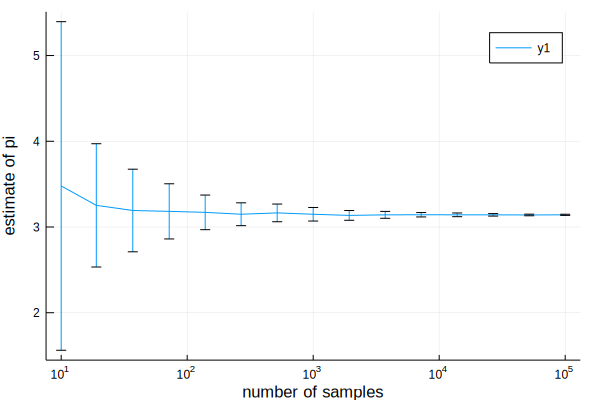

In [9]:
nsamples = round.(Int, collect(exp10.(range(1,stop=5,length=15))))

# This is served as an example, replace this with your own code
fake_mean_y = map(x->pi + 1/x, nsamples)
fake_stdev_y = map(x->0.1/log(x), nsamples)
nsamples = round.(Int, collect(exp10.(range(1,stop=5,length=15))))
mean_y, stdev_y = run_trials()

Plots.plot(nsamples, mean_y, yerror=stdev_y, xaxis=("number of samples", :log), 
                                       ylabel="estimate of pi")

### Things to think about/remember:

- How will you keep track of all the trials?  
- How can you use the map function to help you with the mean and standard deviation?
- Make sure you are comfortable with Arrays/Vectors/Matrices  
